In [3]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.92156863, 0.08235294, 0.72941176,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.54901961, 0.29019608, 0.2627451 ,
        1.        , 1.        , 1.        ],
       [1.        , 0.99607843, 0.15686275, 0.8745098 , 0.16862745,
        0.8627451 , 1.        , 1.        ],
       [1.        , 0.75294118, 0.00392157, 0.09019608, 0.02745098,
        0.4745098 , 1.        , 1.        ],
       [1.        , 0.35686275, 0.6       , 1.        , 0.88235294,
        0.09803922, 0.98039216, 1.        ],
       [1.        , 0.2627451 , 0.90196078, 1.        , 1.        ,
        0.29411765, 0.8745098 , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]])

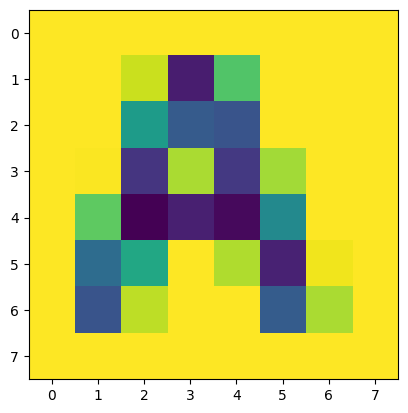

In [4]:
img_path = 'a.png'
# Open image. We also convert to grayscale to make it simpler to deal with
img = np.asarray(Image.open(img_path).convert('L'))
# Normalise to 0-1
img = img / 255

plt.imshow(img)
img

saved to test.png


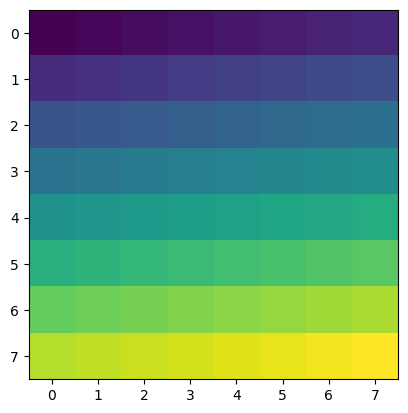

In [5]:
def save_image(data, name, vmin=0, vmax=1):
    cmap = plt.cm.gray
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    
    img = cmap(norm(data))
    plt.imsave(name, img)
    print('saved to {}'.format(name))

# quick test
arr = np.linspace(-1, 1, 8 * 8).reshape((8, 8))
plt.imshow(arr)
save_image(arr, name="test.png", vmin=-1, vmax=1)

In [6]:
freq = np.zeros((8, 8))
freq[0,0] = 1
freq

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

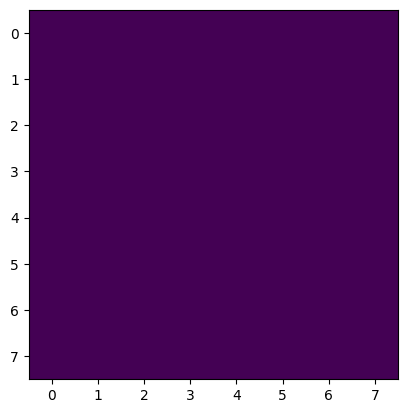

In [7]:
from scipy.fftpack import idct

freq_img = idct(idct(freq, axis=0), axis=1)
plt.imshow(freq_img)

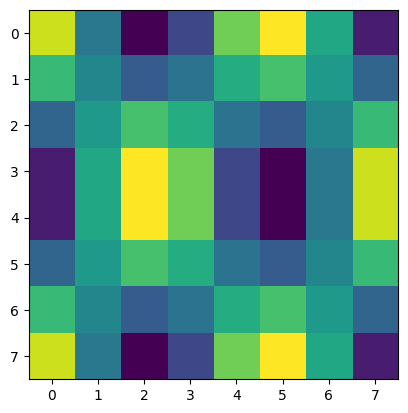

In [8]:
# Ok, lets try for a more interesting frequency
freq = np.zeros((8, 8))
freq[2,3] = 1
freq_img = idct(idct(freq, axis=0), axis=1)
plt.imshow(freq_img)

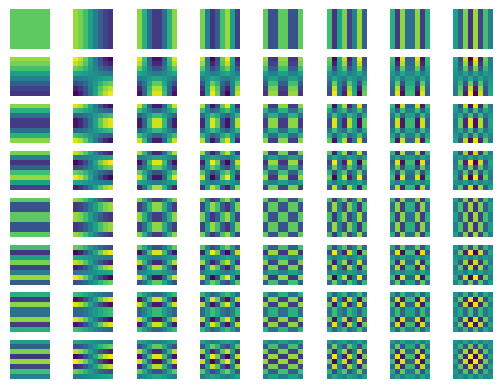

In [9]:
import itertools

fig, axes = plt.subplots(8, 8)

for (x, y) in itertools.product(range(8), range(8)):
    freq = np.zeros((8, 8))
    freq[x, y] = 1
    freq_img = idct(idct(freq, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    ax = axes[x, y]
    # Experimentally all things tend to be within this range
    ax.imshow(freq_img, vmin=-0.25, vmax=0.25)
    ax.axis('off')
    
    

array([[ 6.43676471e+00, -2.67804573e-01,  1.14066855e+00,
         1.28416012e-01,  1.65196078e-01,  2.76328891e-01,
        -1.70577854e-01,  1.21208766e-02],
       [ 1.35862306e-01,  5.87481881e-03,  3.52431981e-01,
         3.01222513e-01, -6.82459017e-01, -3.73353206e-01,
         1.59132959e-01, -2.50116836e-01],
       [ 9.84146150e-01,  1.76109941e-01, -8.77287599e-01,
        -1.82194378e-01, -5.80653053e-03, -2.06642209e-01,
         3.10223718e-01,  4.79610215e-01],
       [-2.13674319e-01, -2.03986691e-02, -2.04994939e-01,
        -2.32005457e-01,  5.74831191e-01,  2.41180524e-01,
        -1.72429322e-01,  4.04527918e-01],
       [ 1.65196078e-01,  1.59533499e-02,  9.12904168e-02,
         1.45871539e-01, -1.86764706e-01, -4.44932490e-02,
        -1.80540936e-01, -5.75197360e-01],
       [ 1.88319103e-01,  3.92539127e-02, -4.27105658e-01,
        -2.17986425e-01,  4.04082687e-01,  3.21360492e-01,
        -6.34915065e-02, -1.83447823e-01],
       [ 2.07300651e-01,  4.019337

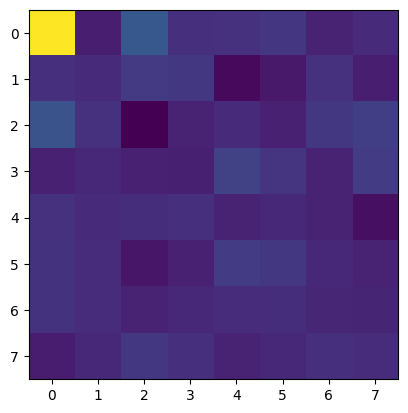

In [10]:
from scipy.fftpack import dct

freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')
plt.imshow(freqs)
freqs

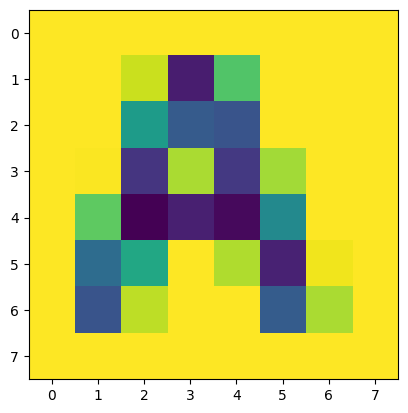

In [11]:
freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')
reconstructed_img = idct(idct(freqs, axis=0, norm='ortho'), axis=1, norm='ortho')
plt.imshow(reconstructed_img)

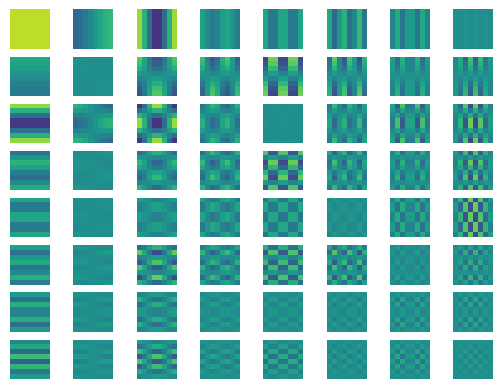

In [12]:
def lerp(a, b, amt):
    '''Linear interpolate between a and b'''
    return a + (b - a) * amt

freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

fig, axes = plt.subplots(8, 8)

for (x, y) in itertools.product(range(8), range(8)):
    freq_select = np.zeros((8, 8))
    freq_select[x, y] = 1
    
    new_freqs = np.multiply(freqs, freq_select)
    
    freq_img = idct(idct(new_freqs, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    # If we draw everything with in the same scale it's hard to see the smaller patterns
    # because they're so small and come out as mostly grey.
    # But if we draw them all with their own scale we can't see the relative size.
    # So we go somewhere between.
    scale_adjust_amt = 0.1
    vmin = lerp(freq_img.min(), -1, scale_adjust_amt)
    vmax = lerp(freq_img.max(), 1, scale_adjust_amt)
    
    ax = axes[x, y]
    ax.imshow(freq_img, vmin=vmin, vmax=vmax)
    ax.axis('off')

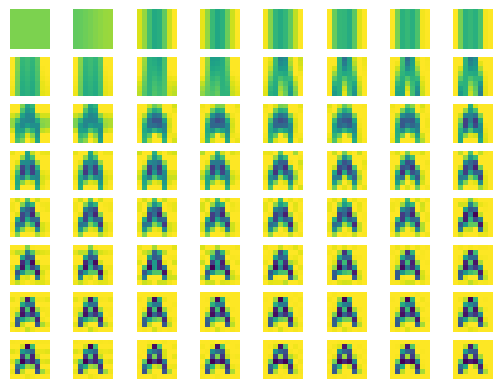

In [13]:
freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

fig, axes = plt.subplots(8, 8)

for (i, (x, y)) in enumerate(itertools.product(range(8), range(8))):
    freq_select = np.zeros(8 * 8)
    freq_select[:i+1] = 1
    freq_select = freq_select.reshape((8, 8))
    
    new_freqs = np.multiply(freqs, freq_select)
    
    freq_img = idct(idct(new_freqs, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    ax = axes[x, y]
    ax.imshow(freq_img, vmin=0, vmax=1)
    ax.axis('off')

In [14]:
# Fill in a similar way to how jpegs do it?

def loop_like_a_jpeg(size):
    """Generates a bunch of tuples that loop over a matrix in a zig-zag way
    """
    flip_dir = False
    for i in range(size):
        r = range(i + 1)
        if flip_dir:
            r = reversed(r)
        
        for j in r:
            # Start at the right edge (0, i), and go upwards to the right
            yield (0 + j, i - j)
        flip_dir = not flip_dir

    for i in range(1, size):
        r = range(size - i)
        if flip_dir:
            r = reversed(r)
        
        for j in r:
            # Start the the bottom edge (i, size-1) and go upwards to the right
            yield(i + j, (size - 1) - j)
        flip_dir = not flip_dir

arr = np.zeros((4, 4))
for (i, (x, y)) in enumerate(loop_like_a_jpeg(4)):
#     print(x, y)
    arr[y, x] = i
arr

array([[ 0.,  1.,  5.,  6.],
       [ 2.,  4.,  7., 12.],
       [ 3.,  8., 11., 13.],
       [ 9., 10., 14., 15.]])

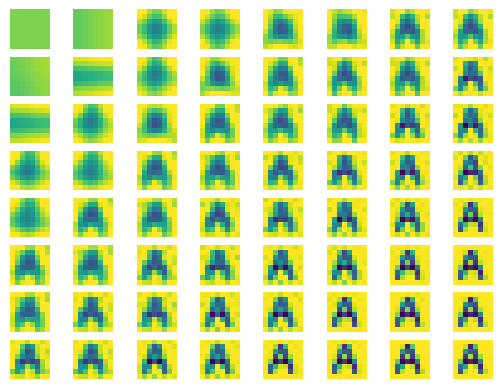

In [15]:
freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

fig, axes = plt.subplots(8, 8)

freq_select = np.zeros((8, 8))
for (y, x) in loop_like_a_jpeg(8):
    freq_select[x, y] = 1;
    
    new_freqs = np.multiply(freqs, freq_select)
    
    freq_img = np.copy(idct(idct(new_freqs, axis=0, norm='ortho'), axis=1, norm='ortho'))
    
    ax = axes[x, y]
    ax.imshow(freq_img, vmin=0, vmax=1)
    ax.axis('off')